<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

# Настройка, чтобы текст в ячейке отображался весь.
pd.set_option('display.max_colwidth', None)
# Настроим 2 знака после точки в float и разделение запятой тысячные до запятой.
pd.set_option('display.float_format', '{:,.2f}'.format)
# Уберем сообщения об ошибке -цепного присваивания.
pd.options.mode.chained_assignment = None

# Выгрузим модель линейной регрессии.
from sklearn.linear_model import LinearRegression
# Выгрузим показатели эффективности модели Линейной регрессии.
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin# Для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Прочитаем файл данных и укажем колонки,
# которые подходят для построения модели.
file_list=['datasets/insurance.csv']
try:
  dataframe = pd.read_csv(file_list[0],header=0,names=['gender','age', 'salary', 'family_size', 'insurance_pay'])
except:
  dataframe = pd.read_csv('https://code.s3.yandex.net/'+file_list[0],header=0,names=['gender','age', 'salary', 'family_size', 'insurance_pay'])

df=dataframe.copy(deep=True)

In [3]:
# Посмотрим общую информацию о датасэте.

print('Размерность датасета')
print()
display (df. info())
df. describe (include='all')

Размерность датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         5000 non-null   int64  
 1   age            5000 non-null   float64
 2   salary         5000 non-null   float64
 3   family_size    5000 non-null   int64  
 4   insurance_pay  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,gender,age,salary,family_size,insurance_pay
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,0.50,30.95,"39,916.36",1.19,0.15
std,0.50,8.44,"9,900.08",1.09,0.46
min,0.00,18.00,"5,300.00",0.00,0.00
25%,0.00,24.00,"33,300.00",0.00,0.00
50%,0.00,30.00,"40,200.00",1.00,0.00
75%,1.00,37.00,"46,600.00",2.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


In [4]:
# Изменим тип данных на 'int' по колонкам 'age', 'salary'.

df['age']=df['age'].astype('int64')
df['salary']=df['salary'].astype('int64')

In [5]:
# Удалим дубликаты из данных.

display (df. duplicated(). sum())
df.drop_duplicates(inplace=True, ignore_index=True)
df. info()

153

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   gender         4847 non-null   int64
 1   age            4847 non-null   int64
 2   salary         4847 non-null   int64
 3   family_size    4847 non-null   int64
 4   insurance_pay  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


In [6]:
# Посмотрим на количество отсутствующих данных

df. isnull(). sum()

gender           0
age              0
salary           0
family_size      0
insurance_pay    0
dtype: int64

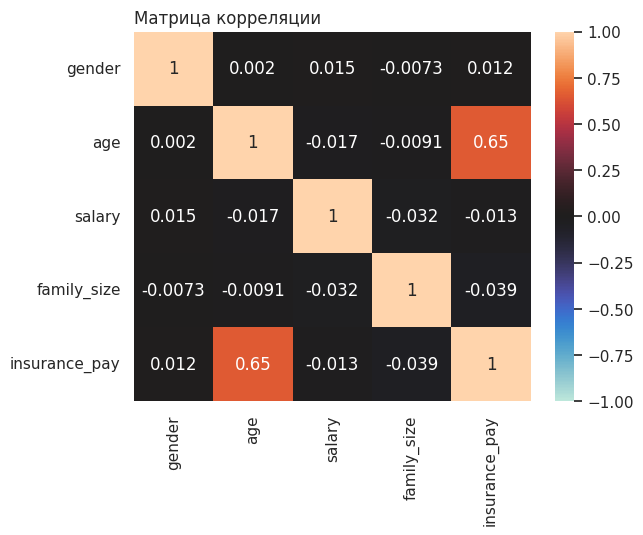

In [7]:
# построим матрицу корреляции.
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1, center= 0)
plt.title("Матрица корреляции", loc="left")
plt. show()

Парный график всех признаков датафрейма


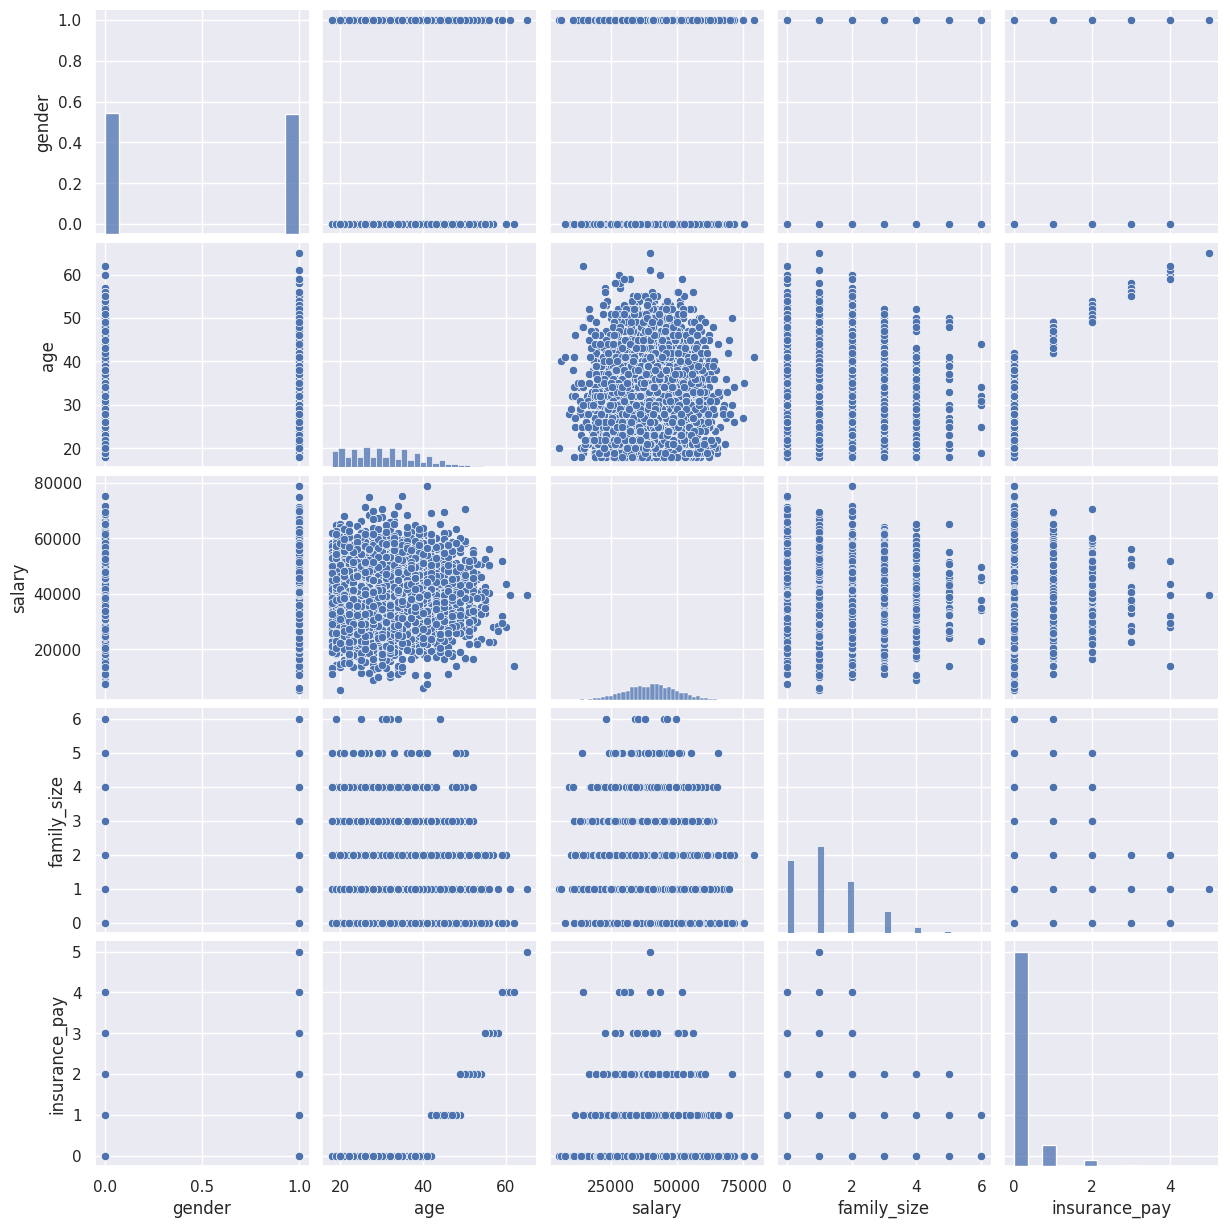

In [8]:
def Show_Pairplot(x):
    sns.pairplot(x)
    plt. show ()
print ('Парный график всех признаков датафрейма')
Show_Pairplot(df)

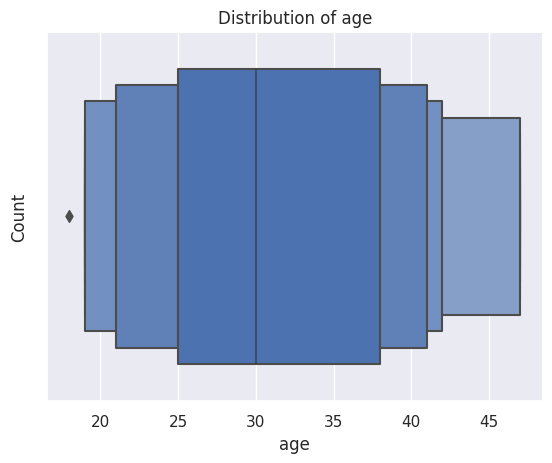

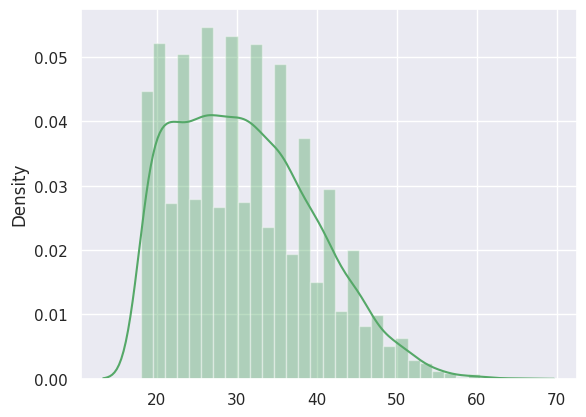

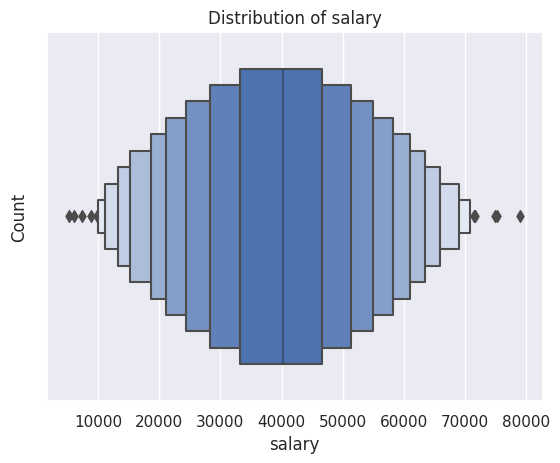

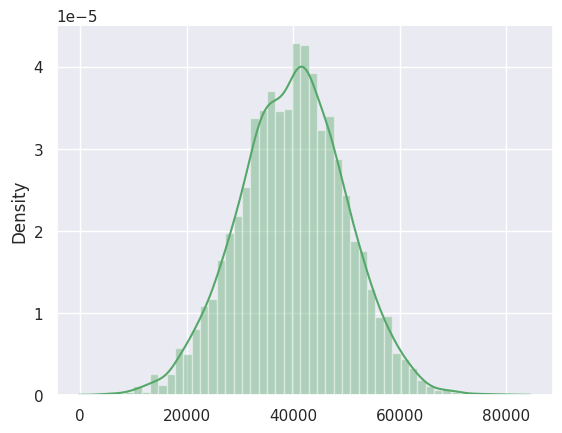

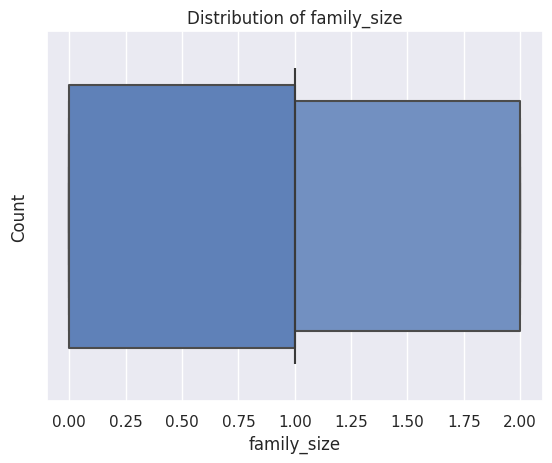

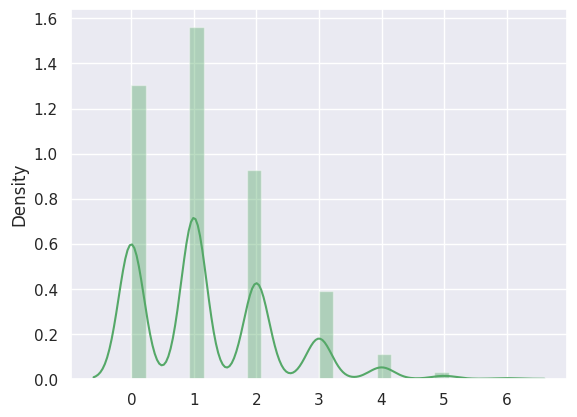

In [9]:
# Построим графики распределения.

for i in df.iloc[:,range(1, 4)]:
  plt. title (f'Distribution of {i}')
  plt. ylabel('Count')
  sns.boxenplot(df[i],x=df[i],saturation=1,scale='linear')
  plt. show()
  sns.distplot(x=df[i],color='g')
  plt. show()

Исходя из графика выше можно сказать, что зарплата имеет нормальное распределение, а графики распределения возраста и количества членов семьи больше похожи на распределение Пуассона. По матрице корреляции можем отметить наличие среднего уровня положительной корреляции между возрастом и целевым признаком, в то же время мультиколлениарных признаков нет, что очень хорошо для нашей модели Линейной регрессии.

In [10]:
# Посмотрим на страховые выплаты по отношению к возрастному признаку.

age_count=df.pivot_table(index='insurance_pay', values='age',aggfunc=['mean','count'])
age_count.columns=['mean_age', 'count_age']
display (age_count)
print('Доля выплат:')
age_count.loc[1:,'count_age'].sum()/age_count[['count_age']].sum()

,mean_age,count_age
insurance_pay,,
0,28.99,4284
1,44.71,423
2,50.87,114
3,55.83,18
4,60.00,7
5,65.00,1


Доля выплат:


count_age   0.12
dtype: float64

Основная масса выплат осуществляется клиентам старше 40 лет. Доля всех выплат составляет лишь 12% от общего числа клиентов и выплаты в количестве больше 3 составляют редкое исключение из правил.

**Вывод:**

Нами был загружен датафрейм по страховым выплатам клиента. Из данных были удалены дубликаты и переименованы колонки. Пропуски и выбросы не были обнаружены.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Воспользуемся основными свойствами матриц:


1. $(AB)^{-1} = B^{-1}A^{-1}$
2. $AB \neq BA$
3. $(AB)^{T} = B^{T}A^{T}$
4. $AA^{-1} = E$
5. $AE = ЕА = А$

**Ответ:** Умножение признаков на обратимую матрицу не влияет на качество линейной регрессии.

**Обоснование:**

$w'=((XP)^{T}(XP))^{-1}(XP)^{T}y = (P^{T}X^{T}XP)^{-1}P^{T}X^{T}y = P^{-1}(X^{T}X)^{-1}P^{T^{-1}}P^{T}X^{T}y
$, где $P^{T^{-1}}P^{T} = E$, тогда $w'=P^{-1}*[(X^{T}X)^{-1}X^{T}y]=P^{-1}w$

Следовательно:
$a'= XP*w' = XPP^{-1}w = XEw = Xw = a$

**Проверим гипотезу:**

In [11]:
# Проверим гипотезу выбирая 1_000 раз и создавая две матрицы 4х4 для их дальнейшего преобразования.

np.random.seed(101)
control=[]
for numb in range(1_000):
  Y=np.random.randint(1,500, size=(4, 4))
  H=np.random.randint(500,1_000, size=(4, 4))
  control.append(np.rint(Y @ H @ np.linalg.inv(H)).astype('int64') == Y)

# Проверим, что в списке 'control' все значения равны 'True', как результат сравнения.

print(control==False)

False


## Алгоритм преобразования

**Алгоритм**

Для шифрования данных  воспользуемся ключ-матрицей - $P$, где $XP=Xcripto$ - процесс шифрования, а $XcriptoP^{−1}=X$. Этот шифр  идентичен полиграммному способу шифрования созданному американским математиком Лестером Хиллом в 1929 году и его особенностью является то, что ключ-матрица должна быть обратимой и квадратной.

**Обоснование**

Гипотеза,по которой построен алгоритм, подтверждена выше.

## Проверка алгоритма

In [12]:
# Создадим функцию для разделения признаков и целевого атрибута, а так же создания зашифрованных признаков.

def split_and_cript(frame=df,target='insurance_pay'):
    X = frame.drop(target, axis=1)
    Y = frame[target]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)
    start, end = np. random. randint(1, 500), np. random. randint(500, 1000)
    P = np.random.randint(start, end, size=(X.shape[1],X.shape[1])).astype('int64')
    n=np.linalg.det(P)
    while n==0:
      P = np.random.randint(start, end, size=(X.shape[1],X.shape[1])).astype('int64')
      n=np.linalg.det(P)
      return(n,P)
    return x_train, x_test, y_train, y_test, P



Ещё можно сделать такую рекурсию:

    def func(dim):
        transform_matrix = np.random.rand(dim, dim)
        try:
            inv = np.linalg.inv(transform_matrix)
            return transform_matrix, inv
        except:
            func(dim)

In [13]:
# Сохраним в переменные результат работы функции 'split_and_cript'.

x_train, x_test, y_train, y_test, P= split_and_cript()

In [14]:
# Создим собственный трансформер для шифрования данных и для дальнейшей передачи в pipeline.

class ExperimentalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    print('\n>>>>>>>init() called.\n')

  def fit(self, X,y = None):
    print('\n>>>>>>>fit() called.\n')
    return self

  def transform(self,X,y = None):
    print('\n>>>>>>>transform() called.\n')
    X_ = X.copy() # creating a copy to avoid changes to original dataset
    X_= X_.values @ P
    return X_

In [15]:
# Создадим класс для модели Линейной Регресии.

class ModelLinearRegression:
  def fit(self, train_features, train_target):
    X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
    y = train_target
    w = np.linalg.inv(X.T @ X) @ X. T @ y
    self.w = w[1:]
    self.w0 = w[0]
  def predict(self, test_features):
    return test_features.dot(self.w) + self.w0

In [16]:
# Обучим модель на признаках без шифрования.
pipeline = Pipeline([
    ('mlr', ModelLinearRegression())
])
pipeline. fit(x_train, y_train)
print('R2 = ',round(r2_score(y_test, pipeline.predict(x_test)),5))

R2 =  0.42308


In [17]:
# Обучим модель на признаках без шифрования.
pipeline_cripto = Pipeline([
    ('transformer', ExperimentalTransformer()),
    ('mlr', ModelLinearRegression())
])
pipeline_cripto. fit(x_train, y_train)
print('R2 = ',round(r2_score(y_test, pipeline_cripto.predict(x_test)),5))


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.


>>>>>>>transform() called.

R2 =  0.42308


Показатели  R2  модели без кодирования признаков и модели обученной на зашифрованных данных совпали. Наш алгоритм шифрования не влияет на качество модели.

**Вывод:**

В данном проекте мы реализовали задачу по защитите данные клиентов страховой компании «Хоть потоп». Был разработан метод позволяющий скрыть персональную информацию, а именно умножили матрицу признаков на обратимую квадратную матрицу случайных чисел.